In [1]:
import tqdm, sys
# tqdm is optional for displaying a progressbar

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
from scipy.spatial import ConvexHull

In [2]:
# Define a function for finding if a point is inside the hull
def point_in_hull(point, hull, tolerance=1e-6):
    return np.all( np.dot( hull.equations[:,:-1], point ) + hull.equations[:,-1] <= tolerance )

In [3]:
import ngauge
ngauge.__version__

'0.1.5'

In [4]:
# Load an example file
n = ngauge.Neuron.from_swc('../basic_usage/ye_swc/20181003_3L_ExM_TRH-5FP_20x_tile1-4_Neuron-11_stdSWC.swc')

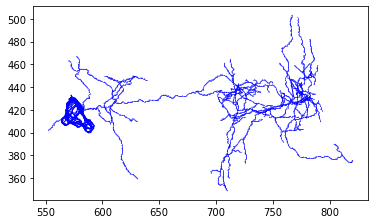

In [5]:
# Plot the neuron
p = n.plot()

In [6]:
# Find the bounding box, just to plot a subvolume
bounds = (
    ( min( x.x for x in n.iter_all_points() ), max( x.x for x in n.iter_all_points() ) ),
    ( min( x.y for x in n.iter_all_points() ), max( x.y for x in n.iter_all_points() ) ),
    ( min( x.z for x in n.iter_all_points() ), max( x.z for x in n.iter_all_points() ) )
)
print( bounds )

print( [x[1]-x[0] for x in bounds] )

((552.62509, 820.23328), (348.5789, 503.23296), (264.0, 466.5))
[267.60819000000004, 154.65406000000002, 202.5]


In [7]:
# Export the points of the neuron into a numpy array
points = np.array( [ (x.x, x.y, x.z) for x in n.iter_all_points() ] )
points.shape

(8357, 3)

In [8]:
# Use convexhull to calculate the hull
hull = ConvexHull(points)

In [9]:
# Create a empty numpy array
out = np.zeros( (300,200,200), dtype=np.uint8)

# Loop through all points, offset by the bounding box values
for i in tqdm.tqdm( range(out.shape[0]) ):
    for j in range(out.shape[1]):
        for k in range(out.shape[2]):
            if point_in_hull( [i+550,j+350,k+250], hull ):
                out[i][j][k] = 1

100%|██████████| 300/300 [02:07<00:00,  2.34it/s]


In [10]:
import tifffile

# Write the file out
tifffile.imwrite( 'output.tif', out )